# Phase 2 
## UK Smokers Prediction ML Project (Predictive Analysis)
### 2 June 2024

Wong Yi Wei (Ethan) S3966890

# Table of Contents

* [1.0 Introduction](#1)<br>
    * [1.1 Phase 1 Summary](#1.1)<br>
    * [1.2 Report Overview](#1.2)<br>
    * [1.3 Overview of Methodology](#1.3)<br>
* [2.0 Data Preparation](#2.0)<br>
    * [2.1 Data Import and Consistency Check](#2.1)<br>
    * [2.2 Encoding Categorical Features](#2.2)<br>
        * [2.2.1 Encoding Target Feature](#2.2.1)<br>
        * [2.2.2 Encoding Categorical Descriptive Feature](#2.2.2)<br>
        * [2.2.3 Feature Scaling](#2.2.3)<br>
* [3.0 Predictive Modeling](#3.0)<br>
    * [3.1 Feature Selection](#3.1)<br>
        * [3.1.1 Full Set of Features](#3.1.1)<br>
        * [3.1.2 F-Score](#3.1.2)<br>
        * [3.1.3 Random Forest Importance (RFI)](#3.1.3)<br>
        * [3.1.4 spFSR](#3.1.4)<br>
        * [3.1.5 Performance Comparison using Paired T-tests](#3.1.5)<br> 
    * [3.2 Model Fitting and Tuning](#3.2)<br>
        * [3.2.1 Data Sampling & Train-Test Splitting](#3.2.1)<br>
        * [3.2.2 K-Nearest Neighbors (KNN)](#3.2.2)<br>
        * [3.2.3 Decision tree (DT)](#3.2.3)<br>
        * [3.2.4 Gaussian Naive Bayes (NB)](#3.2.4)<br>
        * [3.2.5 Model Comparison](#3.2.5)<br>
* [4.0 Critique and Limitations](#4.0)<br>
* [5.0 Summary and Conclusions](#5.0)<br>
    * [5.1 Project Summary](#5.1)<br>
    * [5.2 Summary of Findings](#5.2)<br>
    * [5.3 Conclusion](#5.3)<br>
* [6.0 References](#6.0)<br>


***
# Setup

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
import sklearn.metrics as metrics
from sklearn import feature_selection as fs
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import PowerTransformer
from sklearn.naive_bayes import GaussianNB
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, roc_auc_score
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import confusion_matrix

#Setting to view all contents
pd.set_option('display.max_columns', None)

***
# 1.0 Introduction <a class="anchor" id="1"></a>

## 1.1 Phase 1 Summary <a class="anchor" id="1.1"></a>

In Phase 1 of this project, we have obtained the dataset from kaggle, which was the UK smoking data accessed from: 
[https://www.kaggle.com/datasets/mexwell/uk-smoking-data?resource=download] (MacQuarrie 2024). From the dataset in Phase 1, we have sucessfully obtained a clean and tidy dataset for analysis in Phase 2 of the report, which would be to perform predictive modelling to predict smokers in the United Kingdom based on various demographics within the data. Furthermore during Phase 1 of the project, we have also successfully dealt with missing values, and performed data exploration and visalisations. Through exploring the data, we have discovered that there were a large number of smokers within the data population, there were a higher number of young smokers within the population, and some smokers only smoked on weekdays, and on weekends, or vice versa. 

## 1.2 Report Overview <a class="anchor" id="1.2"></a>

In the Phase 2 of this project in this report, we will first import the data from Phase 1 of the project and further prepare the data by using any encoding for the features as necessary. Then, we will select the best features in the dataset by using multiple feature selection methods and compare the methods using paired t-test for the best possible method. Then, we will fit the model with different algorithms and tune the algorithm as required. After fitting the model, we will then compare each algorithms using different metrics to identify the best model using a consistent training and test data. Furthermore, our goal in this phase of the project is to identify the best model for predictive analysis.

## 1.3 Overview of Methodology <a class="anchor" id="1.3"></a>

In Machine Learning, feature selection is important as it identifies the most importance features for model performance (*Feature Selection* 2024). We will be using the feature selection methods of full set of features, F-Score, Random Forest Importance (RFI), and spFSR. Full set of features selection method utilizes all descriptive features without any selection. Since this method allows for all features, hence no information can be lost. However, this method may be computationally demanding for large datasets as it includes all features within a dataset (Rosidi 2023).  F-score feature selection is a filter-based feature selection which evaluates each features independently against the target variable based on the correlation. This method is also used to split the classification tree to accurately identify the importance of features (Yeung et al 2023). However, limitations of this method are that it does not indicate any of the combination of 2 features, also known as mutual information (Chen and Lin 2006). Random Forest Importance selection method computes the importance of each feature based on the node impurity decrease when splitting on the feature through information gain (Akmand 2022). This selection method tends to allow for more relevancies for features with higher importance scores. Simultaneous Perturbation Stochastic Approximation (spFSR) is a selection method which utilizes a stochastic optimization-based feature selection method to maximise the classification accuracy by pertubing the feature subset (Akmand 2022). This algorithm also searches for a local optimal set of features using error measures such as accuracy rate to identify the best feature.

K-Nearest neighbours is an instance-based learning algorithm used for classification task to classify a new data point based on the majority class of its k-nearest neighbours in the feature space (*What is k-nearest neighbors (KNN) algorithm?* n.d.). This algorithm first calculates the distance such as Euclidean, Manhattan, and Minkowski and selects the k-nearest neighbours based on the distance. Decision Tree is an algorithm that is a non-parametric supervised learning algorithm, which contains branches starting with a root node, feeding into the decision nodes (*What is a decision tree?* n.d.). This algorithm selects the best features and split the data based on the impurity measure such as gini and entropy impurities. Gaussian Naïve Bayes is a classification technique based on a probabilistic approach which assumes each class follows a normal distribution, and each parameter can predict the output variable (Martins 2023). This algorithm calculates the prior probabilities of each class based on the training data using the variance of Laplace smoothing.

Paired t-test is a statistical method to identify if there are any significant differences between the two groups (Gleichmann N 2020). If the p value within the test is greater than the test statistic of 0.05, then there are significant difference between the two groups. Confusion matrix is a matrix which defines the performance of a classification model by comparing the predicted values with the true values (Sharma et al. 2022). Within the matrix, there are true positives, which indicates that the prediction is correct and true, false positives, indicating that there are inaccurate results of true values within the prediction value, false negative, which indicates that the prediction is correct and false, and false positives, indicating that there are inaccurate results of false values within the prediction value. Classification report is a summary of the classification metrics for each class within the machine learning model (*What is the difference between a confusion matrix and a classification report?* n.d.). This includes the recall value, which are the number of true positives within the positive class, which measures how correctly the model identified the actual positive samples (Evidently n.d.). F-1 score within the classification report measures the harmonic mean of precision and recall values to evaluate the model performance (Sharma 2023).

***
# 2.0 Data Preparation <a class="anchor" id="2.0"></a>

## 2.1 Importing Data & Consistency Check <a class="anchor" id="2.1"></a>

Before we do any predictive modelling, we will import the data from Phase 1, which has been exported into a csv file, and check the data structure and types to ensure consistencies with Phase 1 of the report.

In [3]:
#Import Data
smoke=pd.read_csv("Phase2.csv")
smoke.iloc[0:5]

,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke,amt_weekends,amt_weekdays
0,Male,Young,Divorced,No Qualification,British,White,"2,600 to 5,200",The North,False,0,0
1,Female,Middle-Aged,Single,No Qualification,British,White,"Under 2,600",The North,True,12,12
2,Male,Middle-Aged,Married,Degree,English,White,"28,600 to 36,400",The North,False,0,0
3,Female,Middle-Aged,Married,Degree,English,White,"10,400 to 15,600",The North,False,0,0
4,Female,Young,Married,GCSE/O Level,British,White,"2,600 to 5,200",The North,False,0,0


In [4]:
#Shape
smoke.shape

(1561, 11)

In [4]:
#Summary Statistics
smoke.describe(include='all')

,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke,amt_weekends,amt_weekdays
count,1561,1561,1561,1561,1561,1561,1561,1561,1561,1561.000000,1561.000000
unique,2,3,5,8,6,5,8,7,2,NaN,NaN
top,Female,Young,Married,No Qualification,English,White,"5,200 to 10,400",The North,False,NaN,NaN
freq,885,553,759,523,773,1457,394,400,1166,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.187060,3.487508
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757758,7.666444
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000


In [5]:
#Unique Values
colnames=["gender","age","marital_status","highest_qualification",
          "nationality","ethnicity","gross_income","region","smoke",
         "amt_weekends","amt_weekdays"]

for i in colnames:
    print(i,'\n',smoke[i].unique(),'\n')

gender 
 ['Male' 'Female'] 

age 
 ['Young' 'Middle-Aged' 'Old'] 

marital_status 
 ['Divorced' 'Single' 'Married' 'Widowed' 'Separated'] 

highest_qualification 
 ['No Qualification' 'Degree' 'GCSE/O Level' 'GCSE/CSE' 'Other/Sub Degree'
 'Higher/Sub Degree' 'ONC/BTEC' 'A Levels'] 

nationality 
 ['British' 'English' 'Scottish' 'Other' 'Welsh' 'Irish'] 

ethnicity 
 ['White' 'Mixed' 'Black' 'Asian' 'Chinese'] 

gross_income 
 ['2,600 to 5,200' 'Under 2,600' '28,600 to 36,400' '10,400 to 15,600'
 '15,600 to 20,800' 'Above 36,400' '5,200 to 10,400' '20,800 to 28,600'] 

region 
 ['The North' 'Midlands & East Anglia' 'London' 'South East' 'South West'
 'Wales' 'Scotland'] 

smoke 
 [False  True] 

amt_weekends 
 [ 0 12  6  8 15  5 20 25  4 30 10 40  9  7  2 50 16 35 18  1  3 60 24 45] 

amt_weekdays 
 [ 0 12  6  8  2 20 15 25  4 10 30  3 40  9  5 50  7 18 35  1 55 16 24 45] 



In [6]:
#Missing Values
print("Missing Values:",'\n',smoke.isnull().sum())

Missing Values: 
 gender                   0
age                      0
marital_status           0
highest_qualification    0
nationality              0
ethnicity                0
gross_income             0
region                   0
smoke                    0
amt_weekends             0
amt_weekdays             0
dtype: int64


In [7]:
#Data Types
smoke.dtypes

gender                   object
age                      object
marital_status           object
highest_qualification    object
nationality              object
ethnicity                object
gross_income             object
region                   object
smoke                      bool
amt_weekends              int64
amt_weekdays              int64
dtype: object

In [8]:
#Data Type Conversion
#String Conversion
smoke['gender']=smoke['gender'].astype('str')

#Category Conversion
cat=['marital_status','nationality','region']

for i in cat:
    smoke[i]=smoke[i].astype('category')

from pandas.api.types import CategoricalDtype

age_cat=CategoricalDtype(categories=['Young','Middle-Aged',"Old"], ordered = True)

smoke['age']=smoke['age'].astype(age_cat)

quali=CategoricalDtype(categories=["No Qualification","GCSE/CSE","GCSE/O Level","ONC/BTEC","A Levels",
                                   "Other/Sub Degree","Degree","Higher/Sub Degree"], ordered = True)

smoke['highest_qualification']=smoke['highest_qualification'].astype(quali)

income=CategoricalDtype(categories=["Under 2,600","2,600 to 5,200","5,200 to 10,400","10,400 to 15,600",
                                    "15,600 to 20,800","20,800 to 28,600","28,600 to 36,400",
                                    "Above 36,400"], ordered = True)

smoke['gross_income']=smoke['gross_income'].astype(income)

#Check Conversion
smoke.dtypes

gender                     object
age                      category
marital_status           category
highest_qualification    category
nationality              category
ethnicity                  object
gross_income             category
region                   category
smoke                        bool
amt_weekends                int64
amt_weekdays                int64
dtype: object

In [9]:
#Check value spread for nationality
smoke['nationality'].value_counts(normalize=True).mul(100).round(3)

English     49.520
British     32.735
Scottish     8.584
Other        4.228
Welsh        3.587
Irish        1.345
Name: nationality, dtype: float64

In [10]:
#Check values spread for ethnicity
smoke['ethnicity'].value_counts(normalize=True).mul(100).round(3)

White      93.338
Asian       2.434
Black       2.050
Chinese     1.281
Mixed       0.897
Name: ethnicity, dtype: float64

In [11]:
#Check value spread for region
smoke['region'].value_counts(normalize=True).mul(100).round(3)

Midlands & East Anglia    25.625
The North                 25.625
South East                14.798
London                    11.019
South West                 9.353
Scotland                   9.033
Wales                      4.548
Name: region, dtype: float64

In [12]:
#Change ethnicity values to 'Other'
smoke.loc[smoke['ethnicity'] != "White", 'ethnicity'] = 'Other'
smoke['ethnicity']=smoke['ethnicity'].astype('category')
smoke['ethnicity'].unique().tolist()

['White', 'Other']

From the code cells above, we have successfully imported the data from the Phase 1 report labelled ```smoke.csv```. Data import was imported without any errors such as loss of data or missing values. However, upon checking the data types of all columns, columns ```gender```, ```age```, ```marital_status```, ```highest_qualification```, ```nationality```, ```ethnicity```, ```gross_income```, and ```region``` are incorrect and has been addressed appropriately.

Additionally, since we have not checked the value spread for the categorical columns ```nationality```, ```ethnicity```, and ```region```, we have checked and found that for ```ethnicity```, more than 90% of the respondents were white, and this issue is addressed by replacing all other respondents as 'Other'.

## 2.2 Encoding Categorical Features <a class="anchor" id="2.2"></a>

Now that changes are made as appropriate, we will now encode all categorical features as it is essential to encode both the target and descriptive features into numerical features. That is, encoding the categorical values with numerical values. 

### 2.2.1 Encoding Target Feature <a class="anchor" id="2.2.1"></a>

In [13]:
#Encode target feature
Data = smoke.drop(columns='smoke')
target = smoke['smoke']
target.value_counts()

False    1166
True      395
Name: smoke, dtype: int64

In [14]:
#Replace with binary values
target = target.replace({"False": 0, "True": 1})
target.value_counts()

False    1166
True      395
Name: smoke, dtype: int64

### 2.2.2 Encoding Categorical Descriptive Feature <a class="anchor" id="2.2.2"></a>

In this section we will encode the categorical descriptive features by using one-hot encoding. Furthermore, we will also define the dummy variables for categorical descriptive variables with levels for feature selection.

In [15]:
#Show categorical columns
categorical_cols = Data.columns[Data.dtypes == object].tolist()
categorical_cols

['gender']

In [16]:
#One-hot encoding
for col in categorical_cols:
    if (Data[col].nunique() == 2):
        Data[col] = pd.get_dummies(Data[col], drop_first = True)
        
Data = pd.get_dummies(Data)

Data.columns

Index(['gender', 'amt_weekends', 'amt_weekdays', 'age_Young',
       'age_Middle-Aged', 'age_Old', 'marital_status_Divorced',
       'marital_status_Married', 'marital_status_Separated',
       'marital_status_Single', 'marital_status_Widowed',
       'highest_qualification_No Qualification',
       'highest_qualification_GCSE/CSE', 'highest_qualification_GCSE/O Level',
       'highest_qualification_ONC/BTEC', 'highest_qualification_A Levels',
       'highest_qualification_Other/Sub Degree',
       'highest_qualification_Degree',
       'highest_qualification_Higher/Sub Degree', 'nationality_British',
       'nationality_English', 'nationality_Irish', 'nationality_Other',
       'nationality_Scottish', 'nationality_Welsh', 'ethnicity_Other',
       'ethnicity_White', 'gross_income_Under 2,600',
       'gross_income_2,600 to 5,200', 'gross_income_5,200 to 10,400',
       'gross_income_10,400 to 15,600', 'gross_income_15,600 to 20,800',
       'gross_income_20,800 to 28,600', 'gross_inco

In [17]:
#Random sample for Data
Data.sample(5, random_state=999)

,gender,amt_weekends,amt_weekdays,age_Young,age_Middle-Aged,age_Old,marital_status_Divorced,marital_status_Married,marital_status_Separated,marital_status_Single,marital_status_Widowed,highest_qualification_No Qualification,highest_qualification_GCSE/CSE,highest_qualification_GCSE/O Level,highest_qualification_ONC/BTEC,highest_qualification_A Levels,highest_qualification_Other/Sub Degree,highest_qualification_Degree,highest_qualification_Higher/Sub Degree,nationality_British,nationality_English,nationality_Irish,nationality_Other,nationality_Scottish,nationality_Welsh,ethnicity_Other,ethnicity_White,"gross_income_Under 2,600","gross_income_2,600 to 5,200","gross_income_5,200 to 10,400","gross_income_10,400 to 15,600","gross_income_15,600 to 20,800","gross_income_20,800 to 28,600","gross_income_28,600 to 36,400","gross_income_Above 36,400",region_London,region_Midlands & East Anglia,region_Scotland,region_South East,region_South West,region_The North,region_Wales
770,1,30,30,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
541,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
1367,0,5,2,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
571,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
1050,0,5,5,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0


### 2.2.3 Feature Scaling <a class="anchor" id="2.2.3"></a>

In this section we will perform a min-max scaling of descriptive features, and making a copy of the data for future column name references as the data will be converted into ```numPy``` array.

In [18]:
#Min-max scaling
Data_copy = Data.copy()

Data_scaler = preprocessing.MinMaxScaler()
Data_scaler.fit(Data)
Data = Data_scaler.fit_transform(Data)

pd.DataFrame(Data, columns=Data_copy.columns).sample(5, random_state=999)

,gender,amt_weekends,amt_weekdays,age_Young,age_Middle-Aged,age_Old,marital_status_Divorced,marital_status_Married,marital_status_Separated,marital_status_Single,marital_status_Widowed,highest_qualification_No Qualification,highest_qualification_GCSE/CSE,highest_qualification_GCSE/O Level,highest_qualification_ONC/BTEC,highest_qualification_A Levels,highest_qualification_Other/Sub Degree,highest_qualification_Degree,highest_qualification_Higher/Sub Degree,nationality_British,nationality_English,nationality_Irish,nationality_Other,nationality_Scottish,nationality_Welsh,ethnicity_Other,ethnicity_White,"gross_income_Under 2,600","gross_income_2,600 to 5,200","gross_income_5,200 to 10,400","gross_income_10,400 to 15,600","gross_income_15,600 to 20,800","gross_income_20,800 to 28,600","gross_income_28,600 to 36,400","gross_income_Above 36,400",region_London,region_Midlands & East Anglia,region_Scotland,region_South East,region_South West,region_The North,region_Wales
770,1.0,0.500000,0.545455,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
541,0.0,0.000000,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1367,0.0,0.083333,0.036364,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
571,1.0,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1050,0.0,0.083333,0.090909,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


***
# 3.0 Predictive Modeling <a class="anchor" id="3.0"></a>

## 3.1 Feature Selection <a class="anchor" id="3.1"></a>

Here we will select the best features within the dataset by assessing and comparing our performance of the classifiers using all features. We will compare the F-Score, Random Forest Importance (RFI), and spFSR feature selection methods and compare the performance amongst all methods to select the best features.

### 3.1.1 Full Set of Features <a class="anchor" id="3.1.1"></a>

Here we will assess the performance using all features within the dataset by using the stratified 5-fold cross-validation with 3 repetitions, and the random_state is set to 999 for future references for analysis.

In [19]:
#Performance with Full Set of Features
clf = DecisionTreeClassifier(random_state=999)

cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                     n_repeats=3,
                                     random_state=999)

scoring_metric = 'accuracy'

cv_results_full = cross_val_score(estimator=clf,
                             X=Data,
                             y=target, 
                             cv=cv_method, 
                             scoring=scoring_metric)

cv_results_full

array([1.        , 0.99679487, 1.        , 1.        , 1.        ,
       0.99680511, 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.99679487, 1.        , 1.        , 1.        ])

In [20]:
#CV mean results
cv_results_full.mean().round(3)

0.999

### 3.1.2 F-Score <a class="anchor" id="3.1.2"></a>

In this section we will use the F-Score feature selection method as it filters the features and measures the relationship between each descriptive features and the target feature through the F-Score distribution.

In [21]:
#F-score
num_features = 10
fs_fit_fscore = fs.SelectKBest(fs.f_classif, k=num_features)
fs_fit_fscore.fit_transform(Data, target)
fs_indices_fscore = np.argsort(np.nan_to_num(fs_fit_fscore.scores_))[::-1][0:num_features]
fs_indices_fscore

array([ 1,  2,  5,  9,  7,  3, 17, 13, 12,  6])

In [22]:
#Best features for F-score ranked
best_features_fscore = Data_copy.columns[fs_indices_fscore].values
best_features_fscore

array(['amt_weekends', 'amt_weekdays', 'age_Old', 'marital_status_Single',
       'marital_status_Married', 'age_Young',
       'highest_qualification_Degree',
       'highest_qualification_GCSE/O Level',
       'highest_qualification_GCSE/CSE', 'marital_status_Divorced'],
      dtype=object)

In [23]:
#Score of best features for F-score
feature_importances_fscore = fs_fit_fscore.scores_[fs_indices_fscore]
feature_importances_fscore

array([3240.4118294 , 2451.33850509,   58.21575874,   45.53830706,
         40.63115417,   37.99583642,   16.77980932,   16.0445205 ,
         10.09145764,    9.22759182])

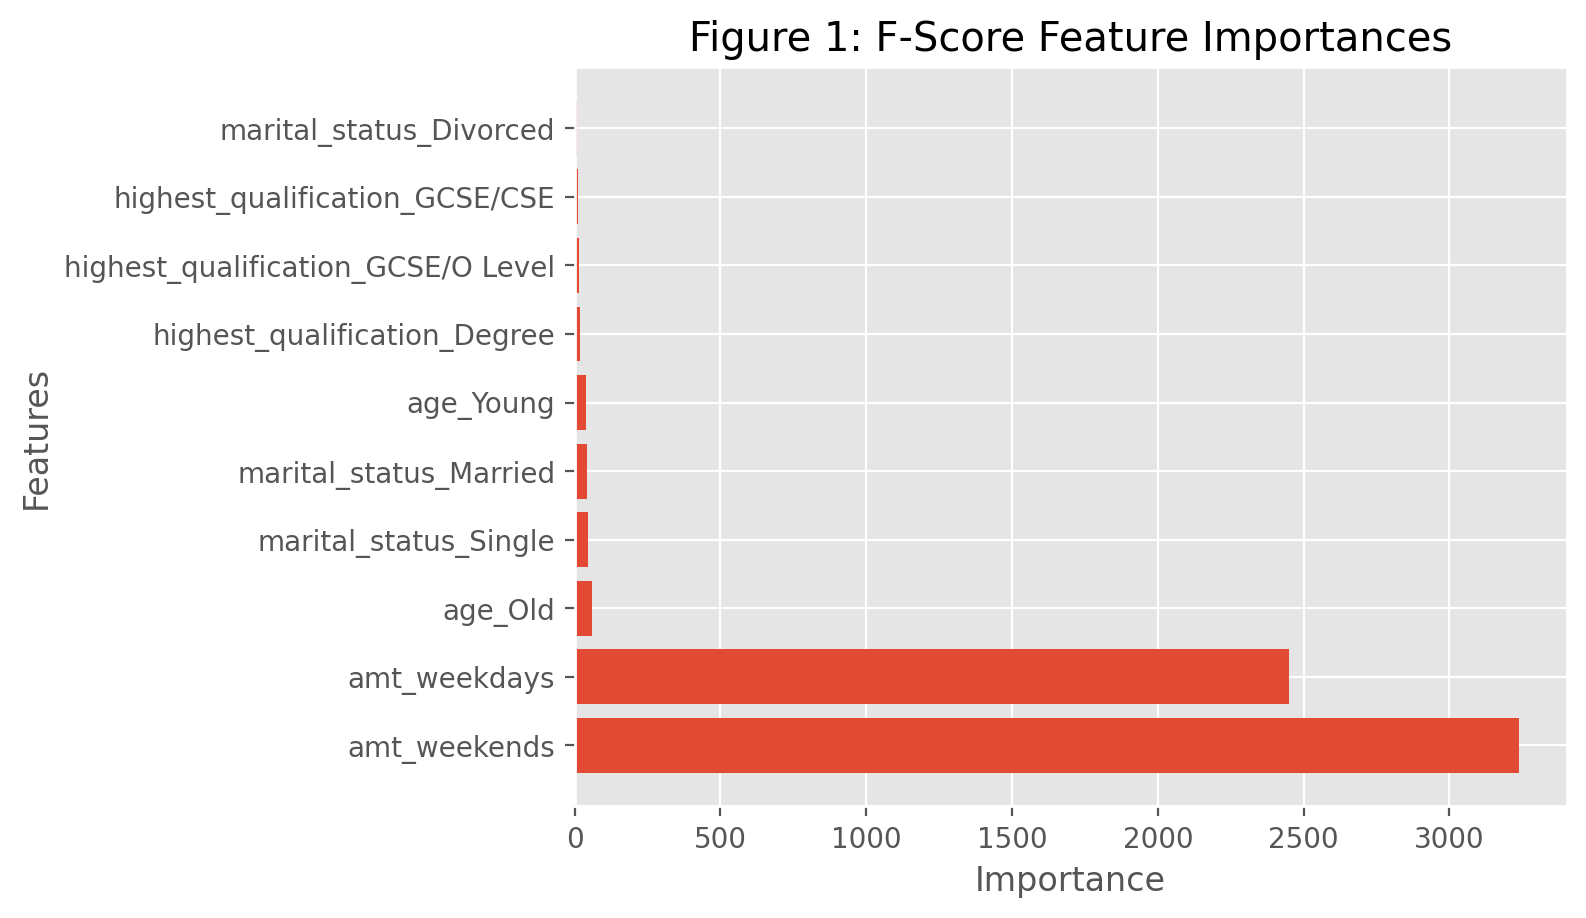

In [24]:
#Visualize features
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

def plot_imp(best_features, scores, method_name):   
    plt.barh(best_features, scores)
    plt.title(method_name + ' Feature Importances')
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.show()

plot_imp(best_features_fscore, feature_importances_fscore, 'Figure 1: F-Score')

In [25]:
#Shape of F-score
Data[:, fs_indices_fscore].shape

(1561, 10)

In [26]:
#CV mean results for F score
cv_results_fscore = cross_val_score(estimator=clf,
                             X=Data[:, fs_indices_fscore],
                             y=target, 
                             cv=cv_method, 
                             scoring=scoring_metric)
cv_results_fscore.mean().round(3)

0.999

From ```Figure 1``` we can observe that for the F-Score Feature Selection, the most important feature is "age", and the least important feature is "region". Furthermore, we can observe that the average cross-validation is consistent with our performance with the full set of features.

### 3.1.3 Random Forest Importance (RFI) <a class="anchor" id="3.1.3"></a>

Here we will select the best features using the Random Forest Importance (RFI), which adds additional randomness to the model and searches for the best features amongst the subset of features.

In [27]:
#Random Forest Importance
num_features = 10 
model_rfi = RandomForestClassifier(n_estimators=100)
model_rfi.fit(Data, target)
fs_indices_rfi = np.argsort(model_rfi.feature_importances_)[::-1][0:num_features]

#Best features for RFI ranked
best_features_rfi = Data_copy.columns[fs_indices_rfi].values
best_features_rfi

array(['amt_weekends', 'amt_weekdays', 'age_Old', 'marital_status_Single',
       'marital_status_Married', 'age_Young',
       'highest_qualification_GCSE/O Level', 'gender',
       'highest_qualification_Degree', 'gross_income_5,200 to 10,400'],
      dtype=object)

In [28]:
#Scores for RFI features
feature_importances_rfi = model_rfi.feature_importances_[fs_indices_rfi]
feature_importances_rfi

array([0.51768691, 0.39560584, 0.00977245, 0.00670413, 0.00559715,
       0.00460095, 0.00340457, 0.00327924, 0.00298661, 0.00258061])

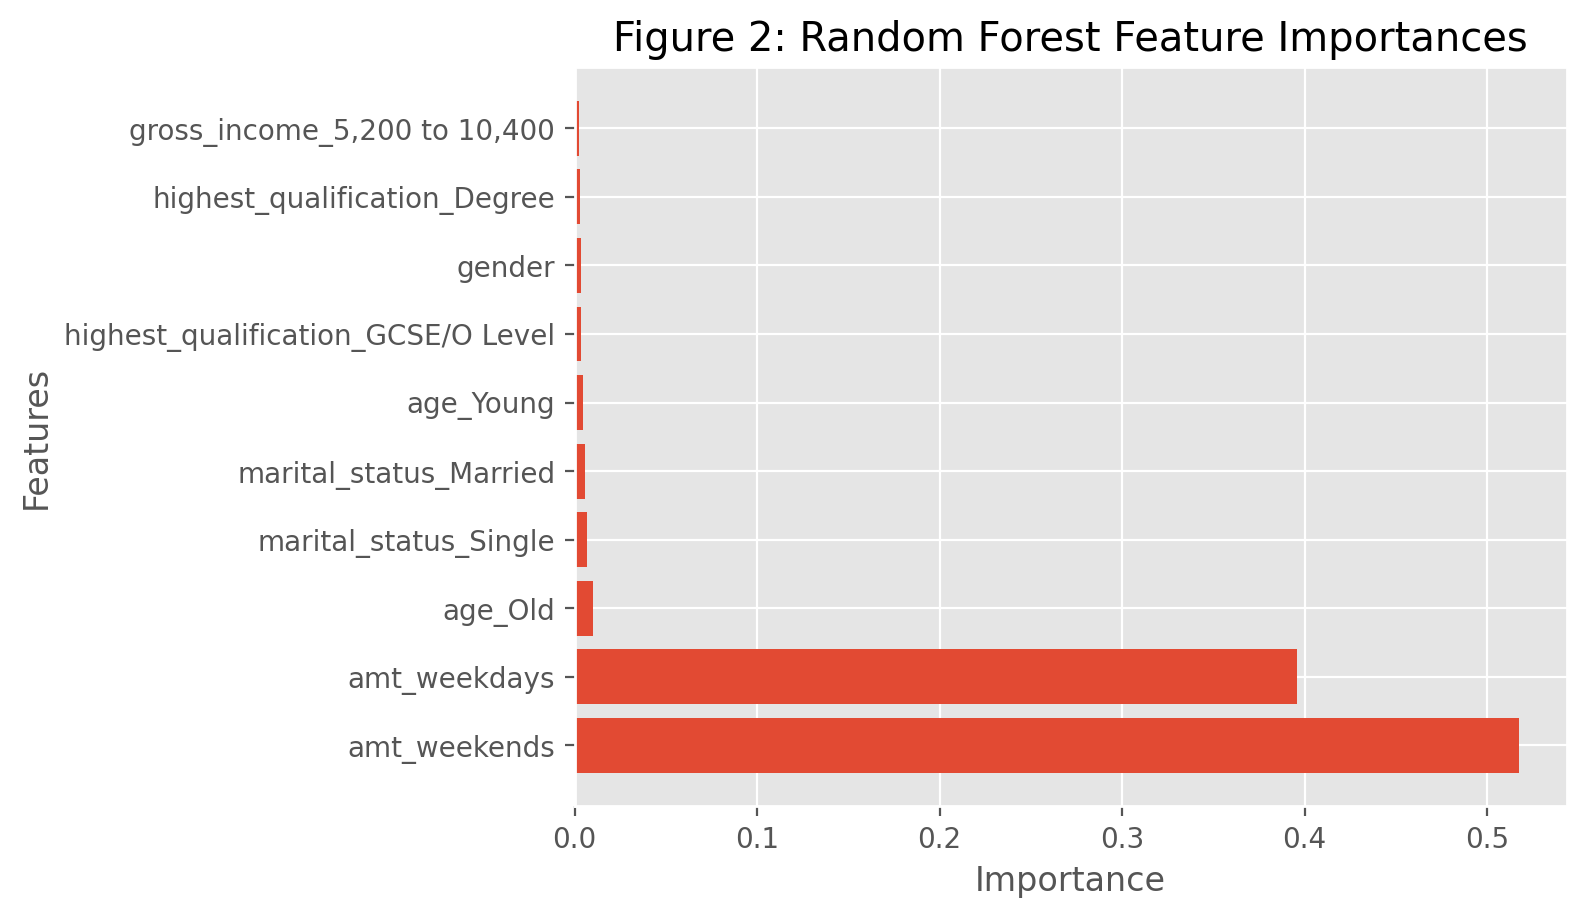

In [29]:
#Visualize features
plot_imp(best_features_rfi, feature_importances_rfi, 'Figure 2: Random Forest')

In [30]:
#CV mean results for RFI
cv_results_rfi = cross_val_score(estimator=clf,
                             X=Data[:, fs_indices_rfi],
                             y=target, 
                             cv=cv_method, 
                             scoring=scoring_metric)
cv_results_rfi.mean().round(3)

0.999

In ```Figure 2``` we can observe that the most important feature with the highest significant importance is amt_weekends and amt_weekdays. Interestingly, the other features weren't as significant.

### 3.1.4 spFSR <a class="anchor" id="3.1.4"></a>

spSFR is a feature selection method using the binary stochastic approximation to select the best features in the dataset.

In [31]:
#spFSR
from spFSR import SpFSR

sp_engine = SpFSR(x=Data, y=target, pred_type='c', wrapper=clf, scoring='accuracy')

np.random.seed(999)
sp_output = sp_engine.run(num_features=num_features).results

SpFSR-INFO: Wrapper: DecisionTreeClassifier(random_state=999)
SpFSR-INFO: Hot start: True
SpFSR-INFO: Hot start range: 0.2
SpFSR-INFO: Feature weighting: False
SpFSR-INFO: Scoring metric: accuracy
SpFSR-INFO: Number of jobs: 1
SpFSR-INFO: Number of observations in the dataset: 1561
SpFSR-INFO: Number of observations used: 1561
SpFSR-INFO: Number of features available: 42
SpFSR-INFO: Number of features to select: 10
SpFSR-INFO: iter_no: 0, num_ft: 10, value: 0.999, st_dev: 0.001, best: 0.999 @ iter_no 0
SpFSR-INFO: ===> iter_no: 0, same feature stall limit reached, initializing search...
SpFSR-INFO: ===> iter_no: 1, same feature stall limit reached, initializing search...
SpFSR-INFO: ===> iter_no: 2, same feature stall limit reached, initializing search...
SpFSR-INFO: ===> iter_no: 3, same feature stall limit reached, initializing search...
SpFSR-INFO: ===> iter_no: 4, same feature stall limit reached, initializing search...
SpFSR-INFO: ===> iter_no: 5, same feature stall limit reached,

SpFSR-INFO: ===> iter_no: 81, same feature stall limit reached, initializing search...
SpFSR-INFO: ===> iter_no: 82, same feature stall limit reached, initializing search...
SpFSR-INFO: ===> iter_no: 83, same feature stall limit reached, initializing search...
SpFSR-INFO: ===> iter_no: 84, same feature stall limit reached, initializing search...
SpFSR-INFO: ===> iter_no: 85, same feature stall limit reached, initializing search...
SpFSR-INFO: ===> iter_no: 86, same feature stall limit reached, initializing search...
SpFSR-INFO: ===> iter_no: 87, same feature stall limit reached, initializing search...
SpFSR-INFO: ===> iter_no: 88, same feature stall limit reached, initializing search...
SpFSR-INFO: ===> iter_no: 89, same feature stall limit reached, initializing search...
SpFSR-INFO: iter_no: 90, num_ft: 10, value: 0.999, st_dev: 0.001, best: 0.999 @ iter_no 0
SpFSR-INFO: ===> iter_no: 90, same feature stall limit reached, initializing search...
SpFSR-INFO: ===> iter_no: 91, same featu

In [32]:
#Best features for spFSR ranked
fs_indices_spfsr = sp_output.get('selected_features')
fs_indices_spfsr

[1, 2, 5, 9, 7, 3, 17, 6, 4, 13]

In [33]:
#Best features for spFSR ranked cont.
best_features_spfsr = Data_copy.columns[fs_indices_spfsr].values
best_features_spfsr

array(['amt_weekends', 'amt_weekdays', 'age_Old', 'marital_status_Single',
       'marital_status_Married', 'age_Young',
       'highest_qualification_Degree', 'marital_status_Divorced',
       'age_Middle-Aged', 'highest_qualification_GCSE/O Level'],
      dtype=object)

In [34]:
#Scores of features for spFSR
feature_importances_spfsr = sp_output.get('selected_ft_importance')
feature_importances_spfsr

array([ 0.1       ,  0.08665648, -0.09739153, -0.09761024, -0.09778658,
       -0.09834239, -0.09895688, -0.09909979, -0.09910913, -0.09922988])

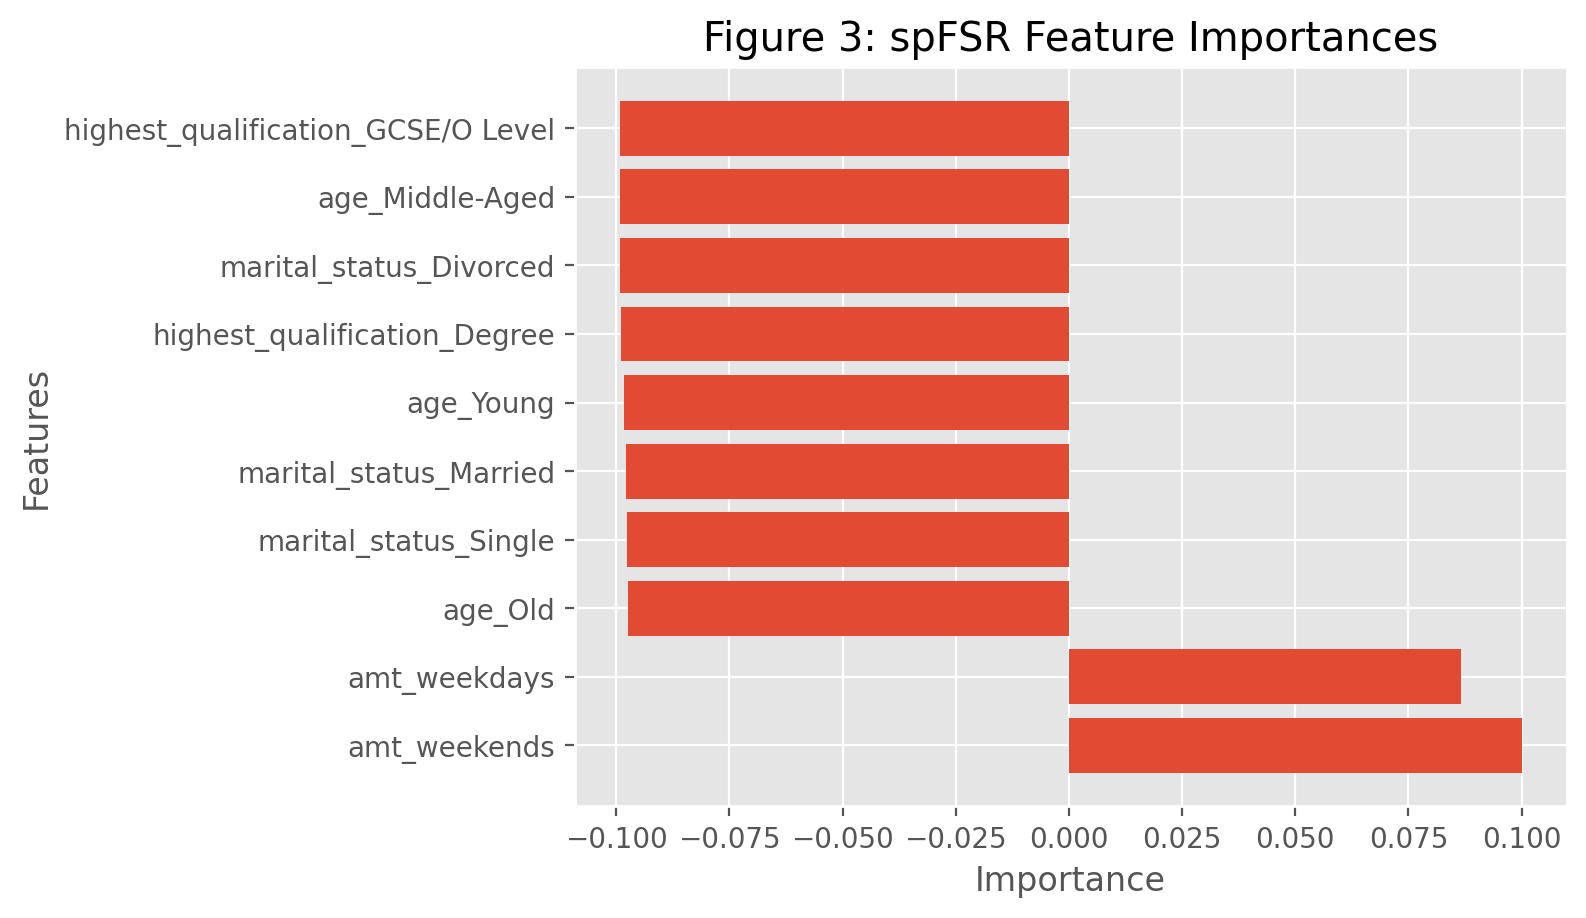

In [35]:
#Visualize features
plot_imp(best_features_spfsr, feature_importances_spfsr, 'Figure 3: spFSR')

In [36]:
#CV mean results for spFSR
cv_results_spfsr = cross_val_score(estimator=clf,
                             X=Data[:, fs_indices_spfsr],
                             y=target, 
                             cv=cv_method, 
                             scoring=scoring_metric)
cv_results_spfsr.mean().round(3)

0.999

```Figure 3``` above shows the spFSR feature importances and we can observe that with previous feature selection methods, amt_weekends and amt_weekdays shows the most important against all other features.

### 3.1.5 Performance Comparison using Paired T-Tests <a class="anchor" id="3.1.5"></a>

For comparing the performance of the feature selection methods, we will use statistical tests to determine if there are any performance differences on whether the feature selection methods are statistically significant. As the feature selection methods harbored different data observations due to the random states, we will test it on the same data partitions to compare the full set of features, random forest importance, and spFSR feature selection methods.

In [37]:
#CV mean results comparison
print('Full Set of Features:', cv_results_full.mean().round(3))
print('F-Score:', cv_results_fscore.mean().round(3))
print('RFI:', cv_results_rfi.mean().round(3))
print('spFSR:', cv_results_spfsr.mean().round(3)) 

Full Set of Features: 0.999
F-Score: 0.999
RFI: 0.999
spFSR: 0.999


The above results indicated that all the feature selection methods has similar performance. Hence, we shall perform statistical tests to diagnose our selection methods on any differences.

In [38]:
#Paired T-test for feature selection
from scipy import stats

print('spFSR v. F Score')
print(stats.ttest_rel(cv_results_spfsr, cv_results_fscore).pvalue.round(3))

print('\n','spFSR v. RFI')
print(stats.ttest_rel(cv_results_spfsr, cv_results_rfi).pvalue.round(3))

print('\n','spFSR v. Full')
print(stats.ttest_rel(cv_results_spfsr, cv_results_full).pvalue.round(3))

print('\n','F Score v. RFI')
print(stats.ttest_rel(cv_results_fscore, cv_results_rfi).pvalue.round(3))

print('\n','F Score v. Full')
print(stats.ttest_rel(cv_results_fscore, cv_results_full).pvalue.round(3))

print('\n','RFI v. Full')
print(stats.ttest_rel(cv_results_rfi, cv_results_full).pvalue.round(3))


spFSR v. F Score
nan

 spFSR v. RFI
nan

 spFSR v. Full
nan

 F Score v. RFI
nan

 F Score v. Full
nan

 RFI v. Full
nan


From the above output, due to the similar cross validation values of 0.999 we received a *nan* error. Thus, we can use either of the four feature selection methods above. Since there are no differences, we shall use the full feature selection method for further analysis.

## 3.2 Model Fitting and Tuning <a class="anchor" id="3.2"></a>

### 3.2.1 Data Sampling & Train-Test Splitting <a class="anchor" id="3.2.1"></a>

Here we will investigate and acquire our optimal parameters to be used for the algorithms. Since we have a low sample of 1561 observations within the dataset, we shall use the 70:30 split for training data and test data, respectively. Furthermore, we will also use a 5-fold stratified cross-validation evaluation method for hyperparameter tuning for all algorithms.

In [39]:
#Data and target shape
print('Data shape:',Data.shape)
print('Target shape:',target.shape)

Data shape: (1561, 42)
Target shape: (1561,)


In [40]:
#Train test splitting
D_train, D_test, t_train, t_test = train_test_split(Data, 
                                                    target, 
                                                    test_size = 0.3, 
                                                    random_state=8)

print('Data train shape:',D_train.shape)
print('Data test shape:',D_test.shape)
print('Target train shape:',t_train.shape)
print('Target test shape:',t_test.shape)

Data train shape: (1092, 42)
Data test shape: (469, 42)
Target train shape: (1092,)
Target test shape: (469,)


In [41]:
#CV method
cv_method = StratifiedKFold(n_splits=5, shuffle=True, random_state=999)

### 3.2.2 K-Nearest Neighbors (KNN) <a class="anchor" id="3.2.2"></a>

Here we will use the K-Nearest Neighbors (KNN) algorithm for predictive analysis. However, before we start with the algorithm we will tune the algorithm by defining the number of neighbors (1-7) and p value of 1 (Manhattan), 2 (Euclidean), and 5 (Minkowski). Furthermore, we shall utilize the cross validation method to aid in finding the optimal parameters for KNN.

In [42]:
#Fit KNN algorithm
model_KNN = KNeighborsClassifier()
params_KNN = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7], 
              'p': [1, 2, 5]}

gs_KNN = GridSearchCV(estimator=model_KNN, 
                      param_grid=params_KNN, 
                      cv=cv_method,
                      verbose=1, 
                      scoring='accuracy',
                      return_train_score=True)

gs_KNN.fit(D_train, t_train);

Fitting 5 folds for each of 21 candidates, totalling 105 fits


In [43]:
#Parameter and score for KNN
print(f"Optimal Parameters for KNN: {gs_KNN.best_params_}")
print(f"Score of Best Paramaters for KNN: {gs_KNN.best_score_}")

Optimal Parameters for KNN: {'n_neighbors': 7, 'p': 1}
Score of Best Paramaters for KNN: 0.8324284696912573


From the above output, we can observe that the optimal paramaters for KNN are an optimal number of neighbors of 7, and optimal distance is 1 (Manhattan Distance). We will now look at the other KNN parameters to observe if the difference is significant or not.

In [44]:
#Function for table
def get_search_results(gs):

    def model_result(scores, params):
        scores = {'mean_score': np.mean(scores),
             'std_score': np.std(scores),
             'min_score': np.min(scores),
             'max_score': np.max(scores)}
        return pd.Series({**params,**scores})

    models = []
    scores = []

    for i in range(gs.n_splits_):
        key = f"split{i}_test_score"
        r = gs.cv_results_[key]        
        scores.append(r.reshape(-1,1))

    all_scores = np.hstack(scores)
    for p, s in zip(gs.cv_results_['params'], all_scores):
        models.append((model_result(s, p)))

    pipe_results = pd.concat(models, axis=1).T.sort_values(['mean_score'], ascending=False)

    columns_first = ['mean_score', 'std_score', 'max_score', 'min_score']
    columns = columns_first + [c for c in pipe_results.columns if c not in columns_first]

    return pipe_results[columns]

In [45]:
#Parameter table
results_KNN = get_search_results(gs_KNN)
results_KNN.head()

,mean_score,std_score,max_score,min_score,n_neighbors,p
18,0.832428,0.028838,0.876147,0.799087,7.0,1.0
19,0.831515,0.032102,0.880734,0.794521,7.0,2.0
20,0.829680,0.031592,0.876147,0.794521,7.0,5.0
16,0.814109,0.028129,0.857798,0.785388,6.0,2.0
15,0.814105,0.025826,0.853211,0.788991,6.0,1.0


From the table output above, we can observe that the differences between the parameter combinations has no significant differences between all parameters.

[Text(0.5, 1.0, 'Figure 4: KNN Performance Comparison')]

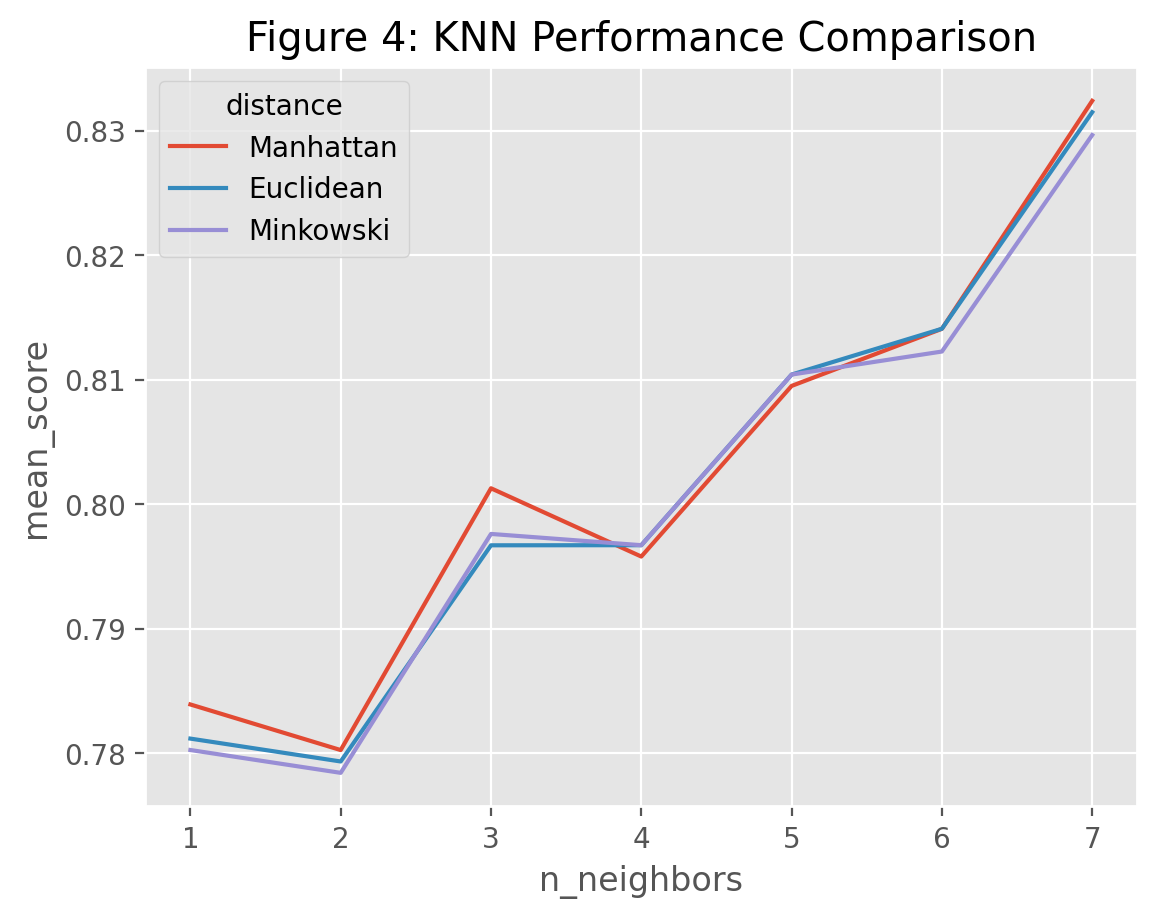

In [46]:
#Visualize parameters
results_KNN_1 = pd.DataFrame(gs_KNN.cv_results_['params'])
results_KNN_1['mean_score']=gs_KNN.cv_results_['mean_test_score']
results_KNN_1['distance']=results_KNN['p'].replace([1,2,5],["Manhattan","Euclidean","Minkowski"])

sns.lineplot(x=results_KNN_1['n_neighbors'],
            y=results_KNN_1['mean_score'],
            hue=results_KNN_1['distance']).set(title="Figure 4: KNN Performance Comparison")

```Figure 4``` above shows the line plot for KNN Performance Comparison where we can observe that as the number of neighbors increases, mean score of the performance increases. Furthermore, we can confirm that Manhattan distance is best performing, which is consistent with our results before. 

### 3.2.3 Decision Tree (DT) <a class="anchor" id="3.2.3"></a>

In this section we will use the Decision Tree (DT) algorithm by assessing the criterion gini and entropy to find the best parameters from a max depth of 1 to 8, and a minimum sample split of 2 and 3.

In [47]:
#DT algorithm
df_classifier = DecisionTreeClassifier(random_state=999)

params_DT = {'criterion': ['gini', 'entropy'],
             'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
             'min_samples_split': [2, 3]}

gs_DT = GridSearchCV(estimator=df_classifier, 
                     param_grid=params_DT, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')

gs_DT.fit(Data, target);

Fitting 5 folds for each of 32 candidates, totalling 160 fits


In [48]:
#Optimal and score of parameters for DT
print(f"Optimal Parameters for DT: {gs_DT.best_params_}")
print(f"Score of Best Paramaters for DT: {gs_DT.best_score_}")

Optimal Parameters for DT: {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 2}
Score of Best Paramaters for DT: 0.9993589743589745


From the output above, we can observe that the optimal parameters for DT are with a criterion of gini, max depth of 2, and a minimum sample split of 2. Additionally, the score for the optimal parameters are 0.9993. We will now look at the other parameters to see whether if there is any significant differences between other parameters.

In [49]:
#Output table for parameters for DT
results_DT = pd.DataFrame(gs_DT.cv_results_['params'])
results_DT['test_score'] = gs_DT.cv_results_['mean_test_score']
results_DT.columns

Index(['criterion', 'max_depth', 'min_samples_split', 'test_score'], dtype='object')

In [50]:
#Output table for parameters for DT cont.
results_DT

,criterion,max_depth,min_samples_split,test_score
0,gini,1,2,0.996795
1,gini,1,3,0.996795
2,gini,2,2,0.999359
3,gini,2,3,0.999359
4,gini,3,2,0.999359
5,gini,3,3,0.999359
6,gini,4,2,0.999359
7,gini,4,3,0.999359
8,gini,5,2,0.999359
9,gini,5,3,0.999359


From the table output above, we can observe that the differences between the parameter combinations has no significant differences between all parameters. Interestingly, many of the combinations yielded similar test score results.

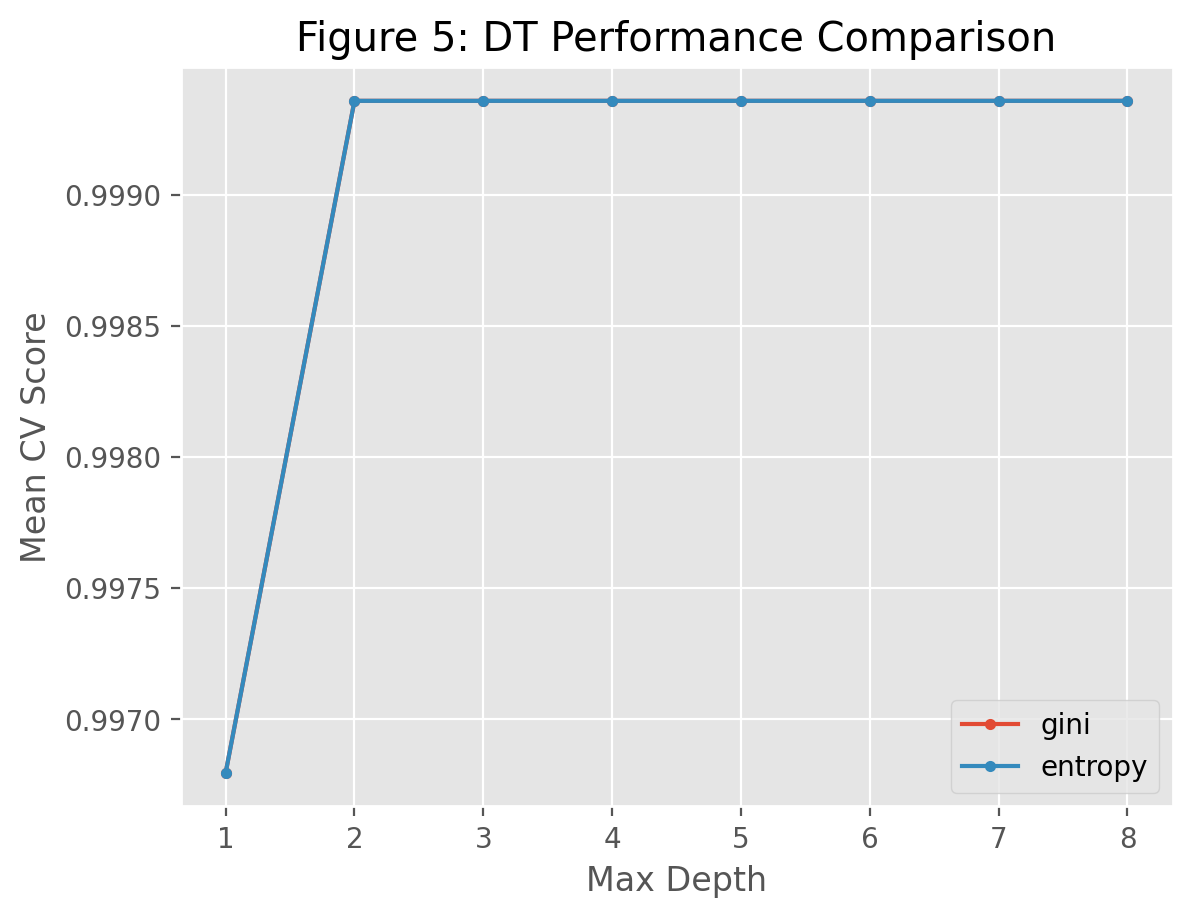

In [51]:
#Visualising parameters
for i in ['gini', 'entropy']:
    temp = results_DT[results_DT['criterion'] == i]
    temp_average = temp.groupby('max_depth').agg({'test_score': 'mean'})
    plt.plot(temp_average, marker = '.', label = i)
    
    
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel("Mean CV Score")
plt.title("Figure 5: DT Performance Comparison")
plt.show()

```Figure 5``` above shows the performance comparison for DT with gini and entropy criterion. Interestingly, due to similar values both criterion follows the same line, and as max depth increases, so does mean cv score. In this case, we will use the recommended DT parameters of criterion gini, max depth of 2, and minimum sample split of 2.

### 3.2.4 Gaussian Naive Bayes (NB) <a class="anchor" id="3.2.4"></a>

In this section we will use the Gaussian Naive Bayes (NB) algorithm by optimizing the variance of Laplace smoothing by first performing a power transformation on the data before fitting the model. 

In [52]:
#NB algorithm
np.random.seed(999)

nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=nb_classifier, 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')

Data_transformed = PowerTransformer().fit_transform(Data)

gs_NB.fit(Data_transformed, target);

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [53]:
#Optimal and score of best parameter for NB
print(f"Optimal Parameters for NB: {gs_NB.best_params_}")
print(f"Score of Best Paramaters for NB: {gs_NB.best_score_}")

Optimal Parameters for NB: {'var_smoothing': 3.5111917342151273e-09}
Score of Best Paramaters for NB: 0.9961599901695749


From the output above, we can observe that the optimal parameters for NB are with variance of Laplace smoothing value of 3.5111917342151273e-09, which is a very low number. Additionally, the score for the optimal parameters are 0.99616. We will now look at the other parameters to see whether if there is any significant differences between other parameters.

In [54]:
#Table for parameters for NB
results_NB = pd.DataFrame(gs_NB.cv_results_['params'])
results_NB['test_score'] = gs_NB.cv_results_['mean_test_score']

In [55]:
#Table for parameters for NB
results_NB_1 = get_search_results(gs_NB)
results_NB_1.head()

,mean_score,std_score,max_score,min_score,var_smoothing
99,0.99616,0.003728,1.0,0.990415,1.000000e-09
98,0.99616,0.003728,1.0,0.990415,1.232847e-09
97,0.99616,0.003728,1.0,0.990415,1.519911e-09
96,0.99616,0.003728,1.0,0.990415,1.873817e-09
95,0.99616,0.003728,1.0,0.990415,2.310130e-09


From the table output above, we can observe that the differences between the parameter combinations has no significant differences between all parameters. Interestingly, many of the combinations yielded similar mean score results.

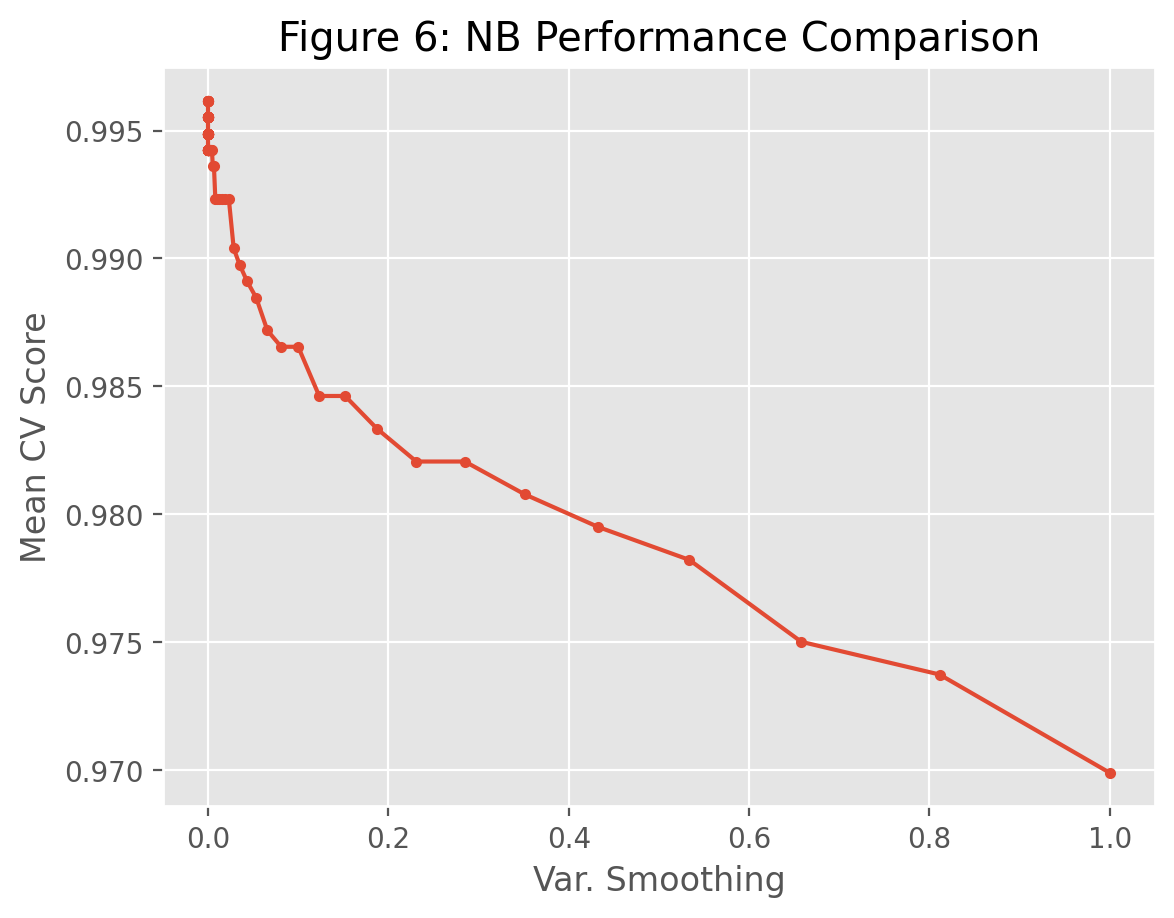

In [56]:
#Visualizing parameters for NB
plt.plot(results_NB['var_smoothing'], results_NB['test_score'], marker = '.')    
plt.xlabel('Var. Smoothing')
plt.ylabel("Mean CV Score")
plt.title("Figure 6: NB Performance Comparison")
plt.show()

From ```Figure 6``` above which shows the performance comparison for NB, we can observe that there are many convergence around the variable smoothing of 0.0, and as the variable smoothing increases, mean cv score decreases. Hence, we will continue with our recommended hyperparameter for variance smoothing of 3.5111917342151273e-09.
 
### 3.2.5 Model Comparison <a class="anchor" id="3.2.5"></a>

In this section we will evaluate the performance of the algorithms using the optimal parameters we have evaluated for KNN, DT, and NB to compare the algorithms. We will also be using the full feature selection as the feature selection method chosen.

In [57]:
#Model using optimal hyperparameters

#KNN
cv_results_KNN = cross_val_score(estimator=gs_KNN.best_estimator_,
                                X=D_test,
                                y=t_test,
                                cv=cv_method,
                                n_jobs=-2,
                                scoring=scoring_metric)

#DT
cv_results_DT = cross_val_score(estimator=gs_DT.best_estimator_,
                                X=D_test,
                                y=t_test,
                                cv=cv_method,
                                n_jobs=-2,
                                scoring=scoring_metric)

#NB
cv_results_NB = cross_val_score(estimator=gs_NB.best_estimator_,
                                X=D_test,
                                y=t_test,
                                cv=cv_method,
                                n_jobs=-2,
                                scoring=scoring_metric)

#Scores comparison
print("KNN Results with Best Parameters:",cv_results_KNN.mean())
print("DT Results with Best Parameters:",cv_results_DT.mean())
print("NB Results with Best Parameters:",cv_results_NB.mean())

KNN Results with Best Parameters: 0.7932280942576069
DT Results with Best Parameters: 0.997872340425532
NB Results with Best Parameters: 0.9914893617021278


From the above output, we can observe that for DT and NB, there are very high scores, but DT resulted in a higher score. Interestingly, KNN resulted in a significant score difference against the other algorithms. We will perform T test comparison to further evaluate the models.

In [58]:
#P-value comparison
print("KNN v. DT:", stats.ttest_rel(cv_results_KNN, cv_results_DT).pvalue.round(4))
print("KNN v. NB:", stats.ttest_rel(cv_results_KNN, cv_results_NB).pvalue.round(4))
print("DT  v. NB:", stats.ttest_rel(cv_results_DT, cv_results_NB).pvalue.round(4))

KNN v. DT: 0.0001
KNN v. NB: 0.0002
DT  v. NB: 0.208


From the output above, we can see that for the t test comparison, KNN and DT had a p value of 0.0001. Since p-value is less than the test statistic, 0.05, we can conclude that there is statistical difference between the KNN and DT. KNN and NB had a p value of 0.0002. Since p-value is less than test statistic, 0.05, we can conclude that there is statistical difference between KNN and NB. However, for DT and NB there was a p value of 0.208. Since p-value is greater than test statistic, 0.05, we can conclude that there is no statistical differences between KNN and NB. Interestingly, only DT and NB had a statistical difference, which meant that DT could be better than NB, or vice versa. Hence, we will continue to explore this with a confusion matrix to evaluate their performance.

In [59]:
#Confusion Matrix
pred_KNN=gs_KNN.predict(D_test)
pred_DT=gs_DT.predict(D_test)
pred_NB=gs_NB.predict(D_test)

print("KNN Confusion Matrix","\n",metrics.confusion_matrix(t_test, pred_KNN),"\n")
print("DT Confusion Matrix","\n",metrics.confusion_matrix(t_test, pred_DT),"\n")
print("NB Confusion Matrix","\n",metrics.confusion_matrix(t_test, pred_NB))

KNN Confusion Matrix 
 [[344  11]
 [ 69  45]] 

DT Confusion Matrix 
 [[355   0]
 [  0 114]] 

NB Confusion Matrix 
 [[  0 355]
 [  0 114]]


In the above confusion matrix outputs, KNN had the 11 false positives and 69 false negatives. DT has performed well with no false positives or false negatives. However, the worst performing would be NB as there were 0 true positives and 355 false positives. With this in mind, we will continue with the model comparison with a classification report.

In [60]:
#Classification Report
print("KNN Classification Report \n",metrics.classification_report(t_test,pred_KNN),"\n")
print("DT Classification Report \n",metrics.classification_report(t_test,pred_DT),"\n")
print("NB Classification Report \n",metrics.classification_report(t_test,pred_NB))

KNN Classification Report 
               precision    recall  f1-score   support

       False       0.83      0.97      0.90       355
        True       0.80      0.39      0.53       114

    accuracy                           0.83       469
   macro avg       0.82      0.68      0.71       469
weighted avg       0.83      0.83      0.81       469
 

DT Classification Report 
               precision    recall  f1-score   support

       False       1.00      1.00      1.00       355
        True       1.00      1.00      1.00       114

    accuracy                           1.00       469
   macro avg       1.00      1.00      1.00       469
weighted avg       1.00      1.00      1.00       469
 

NB Classification Report 
               precision    recall  f1-score   support

       False       0.00      0.00      0.00       355
        True       0.24      1.00      0.39       114

    accuracy                           0.24       469
   macro avg       0.12      0.50      0.2

/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The above outputs show the classification report for KNN, DT, and NB, respectively. From the output we can observe that only DT had a recall and f1-score of 1, which meant that it was able to predict and identify the smokers and non-smokers without any misclassification. KNN had a recall value of 0.97 and 0.39, and f1-score of 0.90 and 0.53 for smokers and non smokers. Although the values are high and close to 1 for smokers, it is still not fully accurate, and non smokers values are relatively low meaning that there are higher misclassification within the prediction data. The worst model was with NB where there were recall values of 0 and 1, and f1-score values of 0 and 0.39. This meant that there were 0 accurate non-smokers and many misclassification within the data.

This is consistent with our previous comparisons where the best model were DT and the inaccurate models were KNN and NB. Hence, with these comparisons it is suffice to say that the best algorithm for the smoker dataset is the Decision Trees (DT) model.

***
# 4.0 Critique and Limitations <a class="anchor" id="4.0"></a>

Throughout both phases, one of the strengths of the dataset was that there was not much missing values which were difficult to replace with, and the dataset were mostly clean and tidy. However, since there were only 1561 observations within the dataset, we were unable to fully and accurately test our data for modeling. This comes as a weakness as if we had a bigger dataset with more observations, we could be able to produce a much more accurate model for selection.

Furthermore, with a rather small dataset, we had to resort with a smaller test data during the performance comparison phase, and had to resort with using the 5 repeated 3 fold cross validation method. However, since we involved this method, there were limited effects of overfitting which is helpful for prediction analysis as overfit data often results in incorrect predictions. Therefore, future updates on this project with a larger dataset would be recommended to ensure the correctness of our results.

***
# 5.0 Summary and Conclusions <a class="anchor" id="5.0"></a>

## 5.1 Project Summary <a class="anchor" id="5.1"></a>

In the Phase 1 of the project, we have successfully obtained a clean and tidy dataset, and to prepare the dataset for analysis in Phase 2. During Phase 1 after importing the data, firstly we have used the ```unique``` function to identify the unique values for each columns to identify any inconsistencies. This was useful as we found that there were missing values in features amt_weekdays, amt_weekends and type. Furthermore, we have identified inconsistencies for features nationality, ethnicity, and gross_income where there were values of "refused" and "unknown". 

To tackle these issues we first replaced the "refused" value to "unknown" value for consistencies. Then, we removed the type column as it was not relevant to our research objectives. However, to rectify the missing values for amt_weekdays and amt_weekends, we first found out that the reason these values were missing was because the respondent was not a smoker. Hence, we simply replaced all missing values with 0 values as they were not smokers and did not smoke on weekdays and weekends. Then, we discretized the numeric features of age by classifying them with values of 'Young', 'Middle-Aged', and 'Old' using the ```qcut``` function from pandas. 

Furthermore, in Phas  1 we also dealt with incorrect data types for the features, and dealt with them as necessary. Once the data cleaning and preprocessing were completed, we then used a multitude of plots to visualize the data through One-Variable, Two-Variable, and Three-Variable plots.

With Phase 1 completed, we then moved on to Phase 2 by first exporting the data from Phase 1 as a csv file, and imported it into our Phase 2 for analysis. During Phase 2, after importing the data we first checked the dataset for any inconsistencies with our Phase 1 output. We found that there were inconsistencies within the data types, however as the encoding only allowed object type features, we decided to leave it as object features as necessary. Then, we performed encoding by first separating our target and data features. Target features were first encoded using binary values as there were only true and false values within the target feature. Then, we performed an one-hot encoding for our data features and also performed a feature scaling using min-max scaling of descriptive features as it was required for feature selection. 

Then, we moved on with feature selection by using selection methods of full feature selection, F-score, Random Forest Importance, and spFSR methods. Then, we compared the feature selection methods through paired t-test to identify our best selection method. Since there were no statistically significant differences between all selection methods, we simply selected the full feature selection method. 

Once feature selection was completed, to ensure consistencies of the test and training data, we used a 70:30 split of the data for future analysis. We also fitted our models with different algorithms to identify the best hyperparameters for the corresponding model, and to tune the model as required. Here we have used the K-Nearest Neighbors, Decision Trees, and Gaussian Naive Bayes algorithms and identified the best hyperparameters for each models. For each model, we have also tested the performance of each hyperparameters to aid in identifying the best parameters and to compare if there were any significant differences. However, we also compared our models to find the best models which worked for our dataset. For this, we have fitted each model with their best respective hyperparameters and fitted them with the same split data. We first compared the scores of each models, then compared the p-values using Paired T-test method, and also generated a confusion matrix and classification report. 
Through this, we were able to identify the best model for our dataset.

## 5.2 Summary of Findings <a class="anchor" id="5.2"></a>

A comprehensive summary of your findings. That is, what exactly did you find about your particular problem?

For both phases of the project, we have first found that missing values within the amt_weekdays, amt_weekends, and type was due to the respondent not being a smoker, and that some smokers only smoke on weekends and some on weekdays. During our data visualizations, we also found that there were more female than male smokers within the dataset, and more smokers within the younger population.

Additionally, during the Phase 2 of the project, we have identified that for all feature selection method except for full feature selection method, amt_weekends and amt_weekdays were identified as the most important descriptive feature against our target feature, which then is followed by age, but were not as significant as amt_weekends and amt_weekdays. When comparing the feature selection methods, we identified that there were no statistical differences between all feature selection methods as they all yielded the same results. 

For the models, we have first identified the optimal hyperparameter for K Nearest Neighbours are number of neighbors of 7, and distance of 1 (Manhattan distance), with a score of 0.8324. Decision tree algorithm was identified with having the optimal hyperparameter of gini criterion, max depth of 2, and a minimum sample split of 2. For Gaussian Naive Bayes, the optimal hyperparameter were a variance of Laplace smoothing value of 3.5111917342151273e-09. 

During our model comparisons, we identified that the best algorithm was Decision Trees as it yielded the best scores, had no false positive or negatives within the confusion matrix, and had no misclassification in the classification report.

## 5.3 Conclusion <a class="anchor" id="5.3"></a>

In summary, we have cleaned the data during Phase 1 and prepared the data for analysis in Phase 2. In this Phase 2 report, the Decision Tree model selected by the full feature selection produces the highest cross-validation score, and the most accurate values on the training data. For this reason the Decision Tree model is selected as the best performing model compared to the K-Nearest Neighbors and Gaussian Naive Bayes models. In relation to our goals and objectives set out in Phase 1, we have successfully attained in goal to obtain a clean and tidy dataset in Phase 1, and here in Phase 2 we have successfully identified the best model for further prediction analysis.
***
# 6.0 References <a class="anchor" id="6.0"></a>

Akmand D (2022) *SK Part 2: Feature Selection and Ranking*, GitHub website, accessed 27 May 2024. https://github.com/akmand/ml_tutorials/blob/master/SK2.ipynb

Akmand D (2022) *spFSR*, GitHub website, accessed 27 May 2024. https://github.com/akmand/spFSR

Chen Y and Lin C (2006) ‘Combining SVMs with Various Feature Selection Strategies’, *Studies in Fuzziness and Soft Computing*, vol 207, doi: 10.1007/978-3-540-35488-8_13.

Evidently (n.d.) *Accuracy vs. precision vs. recall in machine learning: what's the difference?*, Evidently AI website, accessed 27 May 2024. https://www.evidentlyai.com/classification-metrics/accuracy-precision-recall#:~:text=Recall%20is%20a%20metric%20that,the%20number%20of%20positive%20instances.

*Feature Selection* (2024) Heavy.AI website, accessed 27 May 2024. https://www.heavy.ai/technical-glossary/feature-selection

Gleichmann N (2020) *Paired vs Unpaired T-Test: Differences, Assumptions, and Hypotheses*, Technology Networks Informatics website, accessed 27 May 2024. https://www.technologynetworks.com/informatics/articles/paired-vs-unpaired-t-test-differences-assumptions-and-hypotheses-330826#:~:text=A%20paired%20t%2Dtest%20(also,difference%20between%20the%20two%20groups.

MacQuarrie M (2024) *UK Smoking Data* [data set], Kaggle website, accessed 10 April 2024. https://www.kaggle.com/datasets/mexwell/uk-smoking-data?resource=download

Martins C (2023) *Gaussian Naive Bayes Explained With Scikit-Learn*, builtin website, accessed 27 May 2024. https://builtin.com/artificial-intelligence/gaussian-naive-bayes#

Rosidi N (2023) *Advanced Feature Selection Techniques for Machine Learning Models*, KDnuggets website, accessed 27 May 2024. https://www.kdnuggets.com/2023/06/advanced-feature-selection-techniques-machine-learning-models.html#:~:text=Exhaustive%20feature%20selection%20compares%20the,ensures%20the%20best%20feature%20subset.

Sharma D, Chatterjee M, Kaur G and Vavilala S (2022) ‘3 - Deep learning applications for disease diagnosis’, *Academic Press*, pp. 31 – 51, doi: 10.1016/B978-0-12-824145-5.00005-8.

Sharma N (2023) *Understanding and Applying F1 Score: AI Evaluation Essentials with Hands-On Coding Example*, arize website, accessed 27 May 2024, https://arize.com/blog-course/f1-score/#:~:text=F1%20score%20is%20a%20measure,better%20understanding%20of%20model%20performance.

*What is a decision tree?* (n.d.) IBM website, accessed 27 May 2024. https://www.ibm.com/topics/decision-trees#:~:text=A%20decision%20tree%20is%20a,internal%20nodes%20and%20leaf%20nodes.

*What is k-nearest neighbors (KNN) algorithm?* (n.d.) IBM website, accessed 27 May 2024, https://www.ibm.com/topics/knn#:~:text=The%20k%2Dnearest%20neighbors%20(KNN,used%20in%20machine%20learning%20today.

*What is the difference between a confusion matrix and a classification report?* (n.d.) LinkedIn website, accessed 27 May 2024, https://www.linkedin.com/advice/3/what-difference-between-confusion-matrix-classification-hsehf#:~:text=A%20classification%20report%20is%20a,these%20metrics%20across%20all%20classes.

Yeung C, Bunker R and Fujii K (2023) ‘F-Score for the XGBoost model’, *PLOS One*, doi: https://doi.org/10.1371/journal.pone.0284318.s001